## Exercise 1

In [1]:
lambda <- 1.4
k <- 1:10
n <- length(k)


poissonian <- function(k, lambda) {
    numerator <- lambda^k * exp(-lambda)
    denominator <- factorial(k) * (1 - exp(-lambda))
    return(numerator / denominator)
}

ppois_custom <- function(n, k, lambda) {
    cdf <- rep(0, n)
    for (i in 1:n) {
        cdf[i] <- sum(sapply(0:i, function(j) poissonian(j, lambda)))
    }
    return(cdf)
}

In [2]:
pdf_values <- poissonian(k, lambda)
print("PDF values:")
print(pdf_values)

# Calculate cdf values
cdf_values <- ppois_custom(n, k, lambda)
print("CDF values:")
print(cdf_values)

[1] "PDF values:"
 [1] 4.582351e-01 3.207646e-01 1.496901e-01 5.239155e-02 1.466963e-02
 [6] 3.422915e-03 6.845829e-04 1.198020e-04 1.863587e-05 2.609022e-06
[1] "CDF values:"
 [1] 0.785546 1.106311 1.256001 1.308392 1.323062 1.326485 1.327169 1.327289
 [9] 1.327308 1.327310


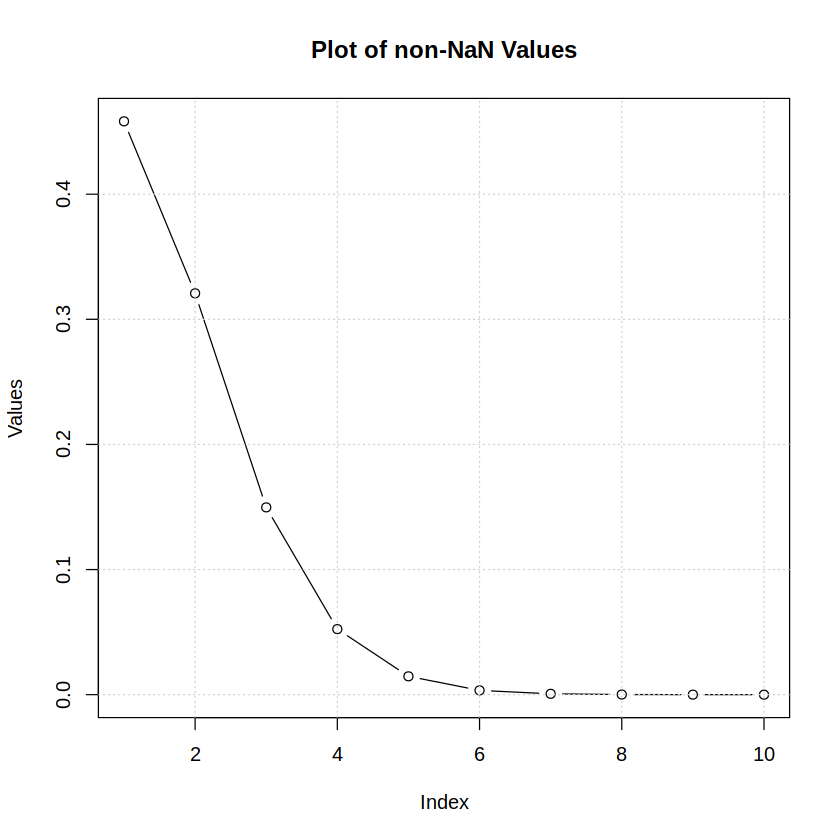

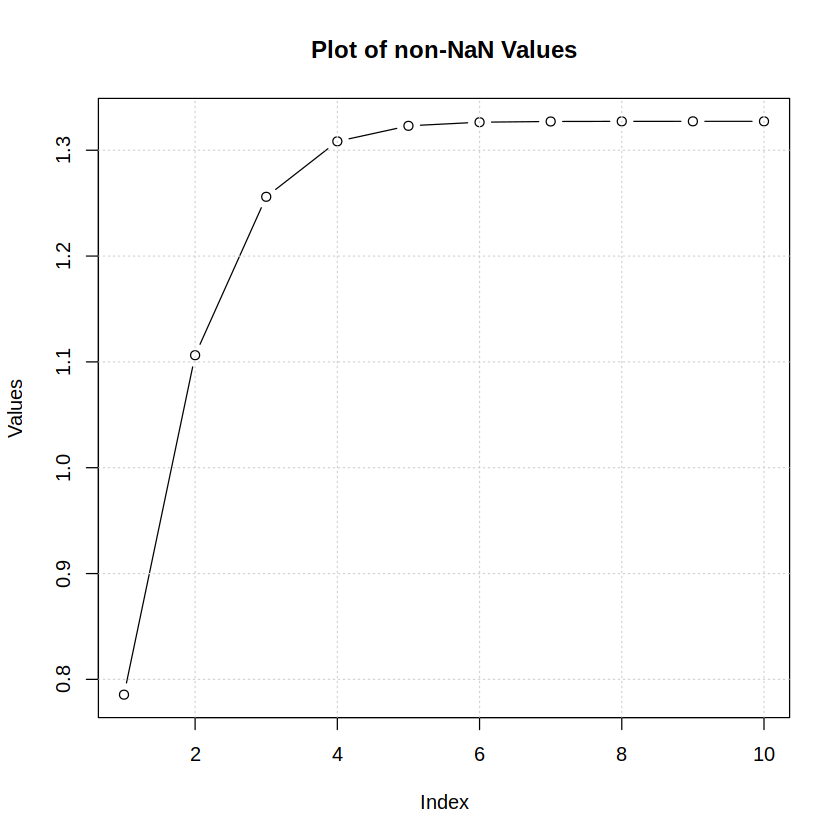

In [3]:
plot(k, pdf_values, type = "b", xlab = "Index", ylab = "Values", main = "Plot of non-NaN Values")
grid()

plot(k, cdf_values, type = "b", xlab = "Index", ylab = "Values", main = "Plot of non-NaN Values")
grid()

In [4]:
k_mean <- sum(k*poissonian(k,lambda))
k_var <- sum(k^2 *poissonian(k,lambda)) - k_mean^2

k_mean
k_var



[1] 1.858231

[1] 1.006695

[1] 1.822

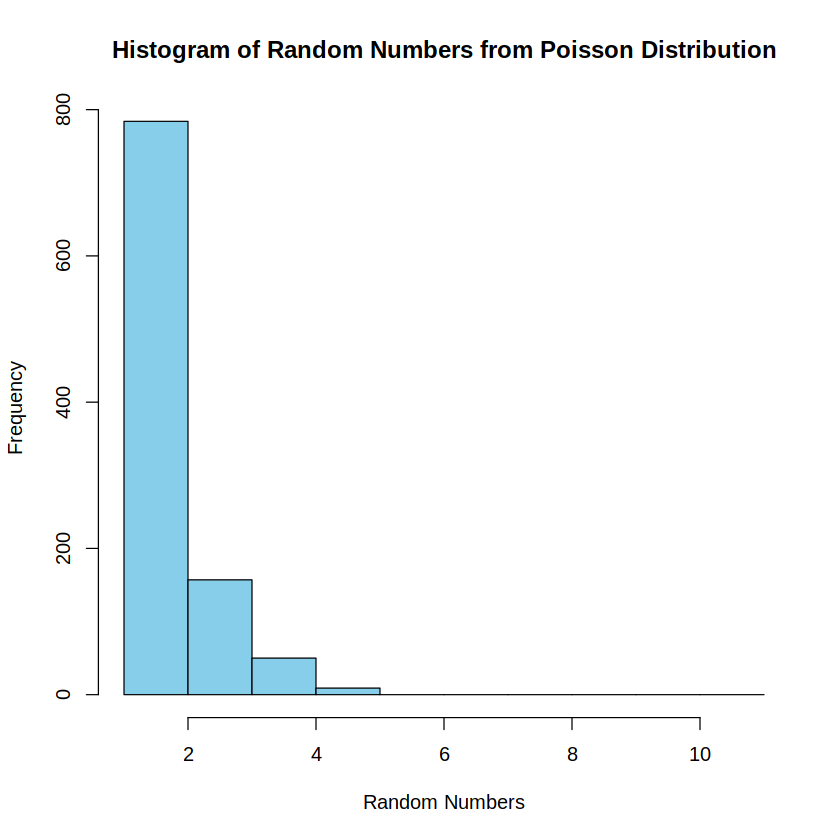

In [5]:
N = 1000
sample <- sample(x=k, size=N, replace=TRUE, prob=pdf_values)

bin_width <- 1
breaks <- seq(min(k), max(k) + bin_width, by = bin_width)
hist(sample, breaks = breaks, col = "skyblue", main = "Histogram of Random Numbers from Poisson Distribution", xlab = "Random Numbers")

mean <- sum(sample)/N
mean

## Exercise 2

In [6]:
E0 <- 7.25
gamma <- 2.7

#function without N

func_no_N <- function(E, E0, gamma) {
  ifelse (E < E0, res <- 1, res <- (E - E0 + 1)^(-gamma))
}

integral <- integrate(func_no_N, lower = 0, upper = Inf, E0 = E0, gamma = gamma)
print(integral)

N <- 1/ (integral$value)
N

func_with_N <- Vectorize(function(E, E0, gamma) {
  ifelse (E < E0, res <- N, res <- N*(E - E0 + 1)^(-gamma))
})

7.838237 with absolute error < 0.00026


[1] 0.1275797

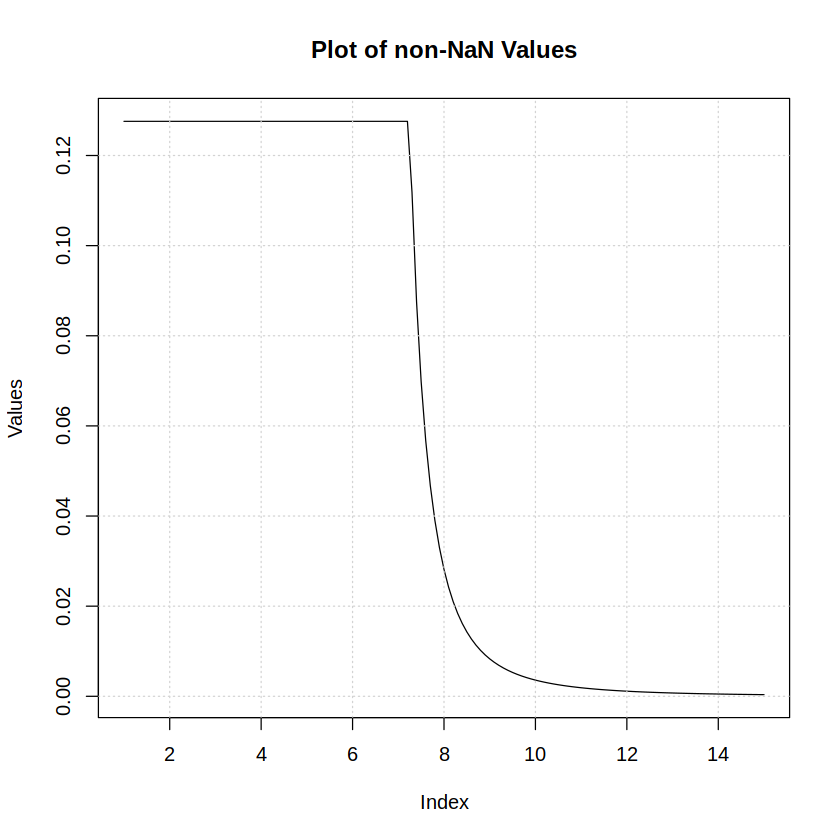

In [47]:
E <- seq(1, 15, 0.1)

pdf_val <- func_with_N(E, E0, gamma)
plot(E, pdf_val, type = "l", xlab = "Index", ylab = "Values", main = "Plot of non-NaN Values")
grid()

In [8]:
cum_func <- Vectorize(function(E, E0, gamma) {
    integral <- integrate(func_with_N, lower = 0, upper = E, E0 = E0, gamma = gamma)$value
    return (integral)
})

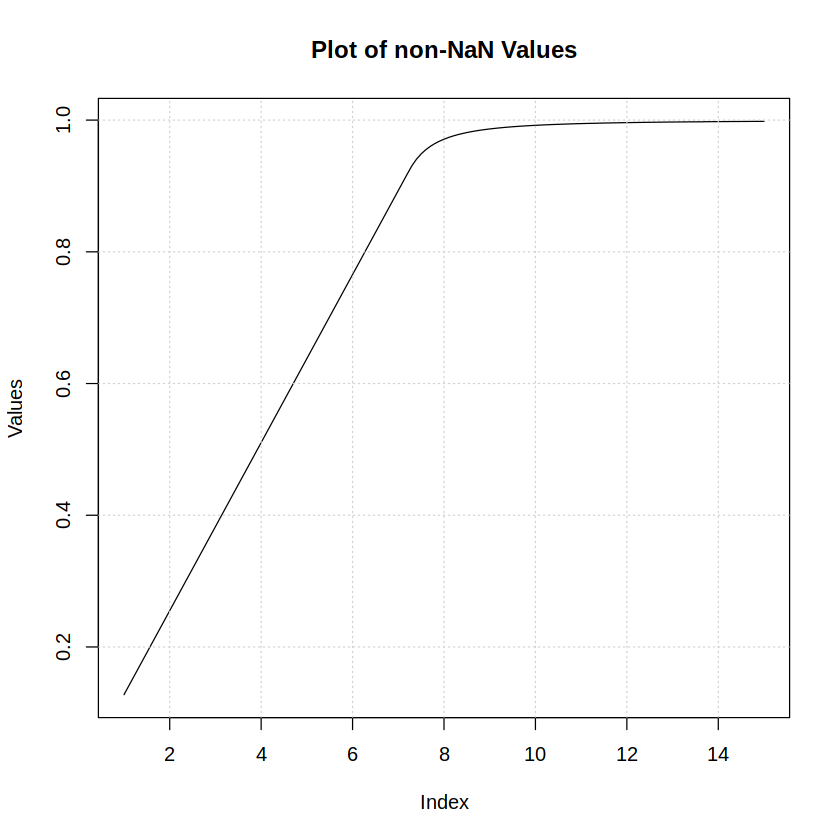

In [9]:
E <- seq(1, 15, 0.1)

cum_val <- cum_func(E, E0, gamma)

plot(E, cum_val, type = "l", xlab = "Index", ylab = "Values", main = "Plot of non-NaN Values")
grid()

In [79]:
mean_function <- Vectorize(function(E, E0, gamma) {
  ifelse (E < E0, res <- N*E, res <- (N*E)*(E - E0 + 1)^(-gamma))
})

In [83]:
E_mean <- integrate(mean_function, lower = 0, upper = Inf, E0 = E0, gamma = gamma)$value

E_mean

[1] 4.004251

## Exercise 3

In [93]:
lambda <- 2
k <- 5

bound_markov <- lambda/k
bound_markov

[1] 0.4

In [94]:
n <- 0:4
pois <- 1 - sum(dpois(n,lambda))
pois

[1] 0.05265302

This value obtained with poissonian distribution is consistent with the Markov inequality

In [97]:
variance <- 2

# In order to be consistent with the formula I must use k = 3
k <- 3

bound_cheb <- variance/ (k**2)
bound_cheb

[1] 0.2222222

It is a better boundary in this situation

## Exercise 4

## Exercise 5

## Exercise 6